In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

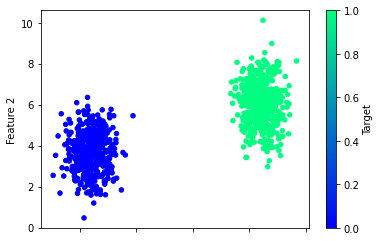

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
print(nn_model)

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 825us/step - loss: 1.6710 - accuracy: 0.0000e+00
Epoch 2/100
24/24 [==============================] - 0s 829us/step - loss: 1.5230 - accuracy: 0.0000e+00
Epoch 3/100
24/24 [==============================] - 0s 824us/step - loss: 1.5331 - accuracy: 0.0000e+00
Epoch 4/100
24/24 [==============================] - 0s 757us/step - loss: 1.4448 - accuracy: 0.0000e+00
Epoch 5/100
24/24 [==============================] - 0s 736us/step - loss: 1.4181 - accuracy: 0.0000e+00
Epoch 6/100
24/24 [==============================] - 0s 540us/step - loss: 1.3644 - accuracy: 0.0000e+00
Epoch 7/100
24/24 [==============================] - 0s 644us/step - loss: 1.3000 - accuracy: 0.0000e+00
Epoch 8/100
24/24 [==============================] - 0s 623us/step - loss: 1.2694 - accuracy: 0.0000e+00
Epoch 9/100
24/24 [==============================] - 0s 625us/step - loss: 1.2226 - accuracy: 0.0000e+00
Epoch 10/100
24/24 [==============================] - 0

24/24 [==============================] - 0s 650us/step - loss: 0.6933 - accuracy: 0.5041
Epoch 81/100
24/24 [==============================] - 0s 522us/step - loss: 0.6948 - accuracy: 0.4712
Epoch 82/100
24/24 [==============================] - 0s 606us/step - loss: 0.6934 - accuracy: 0.4993
Epoch 83/100
24/24 [==============================] - 0s 559us/step - loss: 0.6934 - accuracy: 0.4993
Epoch 84/100
24/24 [==============================] - 0s 600us/step - loss: 0.6934 - accuracy: 0.4997
Epoch 85/100
24/24 [==============================] - 0s 609us/step - loss: 0.6936 - accuracy: 0.4967
Epoch 86/100
24/24 [==============================] - 0s 619us/step - loss: 0.6936 - accuracy: 0.4931
Epoch 87/100
24/24 [==============================] - 0s 566us/step - loss: 0.6928 - accuracy: 0.5141
Epoch 88/100
24/24 [==============================] - 0s 580us/step - loss: 0.6925 - accuracy: 0.5226
Epoch 89/100
24/24 [==============================] - 0s 607us/step - loss: 0.6923 - accuracy: 

<AxesSubplot:>

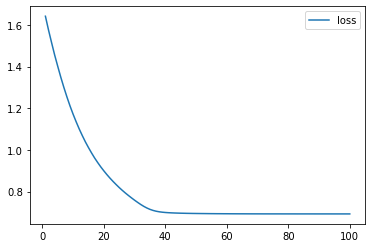

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

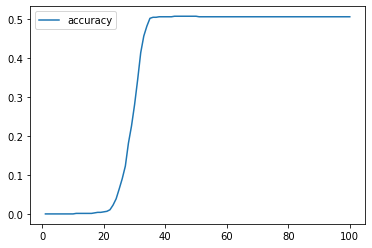

In [13]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.6941 - accuracy: 0.4720
Loss: 0.6941230297088623, Accuracy: 0.47200000286102295


In [15]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [16]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict(new_X_scaled)

array([[0.4921781],
       [0.4921781],
       [0.4921781],
       [0.4921781],
       [0.4921781],
       [0.4921781],
       [0.4921781],
       [0.4921781],
       [0.4921781],
       [0.4921781]], dtype=float32)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

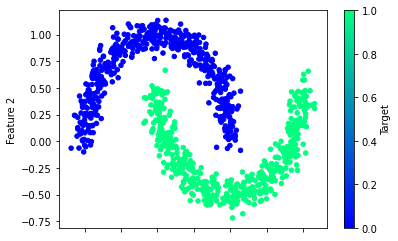

In [17]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [18]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [19]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 955us/step - loss: 0.7045 - accuracy: 0.3853
Epoch 2/100
24/24 [==============================] - 0s 999us/step - loss: 0.7010 - accuracy: 0.4040
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.4333
Epoch 4/100
24/24 [==============================] - 0s 924us/step - loss: 0.6951 - accuracy: 0.4733
Epoch 5/100
24/24 [==============================] - 0s 940us/step - loss: 0.6935 - accuracy: 0.5067
Epoch 6/100
24/24 [==============================] - 0s 912us/step - loss: 0.6927 - accuracy: 0.5200
Epoch 7/100
24/24 [==============================] - 0s 868us/step - loss: 0.6923 - accuracy: 0.5280
Epoch 8/100
24/24 [==============================] - 0s 823us/step - loss: 0.6920 - accuracy: 0.5280
Epoch 9/100
24/24 [==============================] - 0s 840us/step - loss: 0.6919 - accuracy: 0.5307
Epoch 10/100
24/24 [==============================] - 0s 884us/step - loss: 0.6917 - accuracy

24/24 [==============================] - 0s 867us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 82/100
24/24 [==============================] - 0s 822us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 83/100
24/24 [==============================] - 0s 888us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 85/100
24/24 [==============================] - 0s 954us/step - loss: 0.6913 - accuracy: 0.5307
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch

<AxesSubplot:>

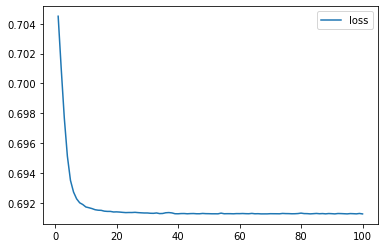

In [20]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

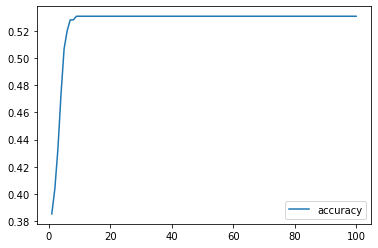

In [21]:
# Plot the loss
history_df.plot(y="accuracy")

In [22]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [23]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [24]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 781us/step - loss: 1.0025 - accuracy: 0.2733
Epoch 2/100
24/24 [==============================] - 0s 569us/step - loss: 0.9501 - accuracy: 0.3235
Epoch 3/100
24/24 [==============================] - 0s 607us/step - loss: 0.8388 - accuracy: 0.4574
Epoch 4/100
24/24 [==============================] - 0s 555us/step - loss: 0.7964 - accuracy: 0.5153
Epoch 5/100
24/24 [==============================] - 0s 547us/step - loss: 0.7244 - accuracy: 0.5968
Epoch 6/100
24/24 [==============================] - 0s 575us/step - loss: 0.6735 - accuracy: 0.6635
Epoch 7/100
24/24 [==============================] - 0s 565us/step - loss: 0.6240 - accuracy: 0.6893
Epoch 8/100
24/24 [==============================] - 0s 636us/step - loss: 0.5779 - accuracy: 0.7280
Epoch 9/100
24/24 [==============================] - 0s 607us/step - loss: 0.5368 - accuracy: 0.7894
Epoch 10/100
24/24 [==============================] - 0s 564us/step - loss: 0.5229 - accura

24/24 [==============================] - 0s 564us/step - loss: 0.2334 - accuracy: 0.8957
Epoch 82/100
24/24 [==============================] - 0s 564us/step - loss: 0.2257 - accuracy: 0.9039
Epoch 83/100
24/24 [==============================] - 0s 564us/step - loss: 0.2328 - accuracy: 0.8923
Epoch 84/100
24/24 [==============================] - 0s 580us/step - loss: 0.2702 - accuracy: 0.8816
Epoch 85/100
24/24 [==============================] - 0s 520us/step - loss: 0.2488 - accuracy: 0.8902
Epoch 86/100
24/24 [==============================] - 0s 536us/step - loss: 0.2285 - accuracy: 0.9011
Epoch 87/100
24/24 [==============================] - 0s 651us/step - loss: 0.2435 - accuracy: 0.8871
Epoch 88/100
24/24 [==============================] - 0s 694us/step - loss: 0.2659 - accuracy: 0.8775
Epoch 89/100
24/24 [==============================] - 0s 650us/step - loss: 0.2526 - accuracy: 0.8959
Epoch 90/100
24/24 [==============================] - 0s 564us/step - loss: 0.2495 - accuracy: 